# Working with Tick Data 1

In [1]:
%matplotlib inline

import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

def show_time( label_string ):
    ts = time.time()
    st = datetime.datetime.fromtimestamp( ts ).strftime( '%Y-%m-%d %H:%M:%S:%f' )
    print( label_string + ' : ' + st )

## Trade Data

In [14]:
show_time( 'load trades' )
trades = pd.read_csv('../data/TSLA-trades-aug19v2.zip', infer_datetime_format=True)
show_time( 'load complete' )

load trades : 2020-02-02 20:37:05:434040
load complete : 2020-02-02 20:37:06:827327


In [15]:
show_time( 'indexing trades' )
format = '%Y%m%d%H:%M:%S.%f'

# fix padding on time
times = trades['TIME_M'].apply(lambda x: x.zfill(18))
timestamps = trades['DATE'].astype(str) + times
times = pd.to_datetime( timestamps, format = format )
trades.index = times
trades = trades.drop(columns=['DATE', 'TIME_M'])
show_time( "index trades done" )

indexing trades : 2020-02-02 20:37:07:805228
index trades done : 2020-02-02 20:37:14:720827


In [16]:
len(trades)

1360479

In [17]:
trades.head()

,SYM_ROOT,SYM_SUFFIX,SIZE,PRICE
2019-08-01 09:30:00.393481242,TSLA,NaN,10,242.045
2019-08-01 09:30:00.694857858,TSLA,NaN,5,242.030
2019-08-01 09:30:00.694865831,TSLA,NaN,4,242.010
2019-08-01 09:30:00.963704893,TSLA,NaN,69895,242.650
2019-08-01 09:30:00.963800979,TSLA,NaN,69895,242.650


In [18]:
len(trades['2019-08-01'])

91195

## Quote Data

In [20]:
# now let's get quotes
show_time( 'load quotes' )
quotes = pd.read_csv('../data/TSLA-quotes-aug19v2.zip')
show_time( 'load complete' )

load quotes : 2020-02-02 20:37:56:458735
load complete : 2020-02-02 20:38:06:957314


In [21]:
len(quotes)

8952989

In [22]:
quotes.head()

,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,SYM_ROOT,SYM_SUFFIX
0,20190801,9:30:00.221856542,A,241.34,1,243.33,1,TSLA,NaN
1,20190801,9:30:00.415319200,C,240.88,1,243.78,1,TSLA,NaN
2,20190801,9:30:00.415596052,N,241.34,1,243.33,1,TSLA,NaN
3,20190801,9:30:00.833394292,Y,241.46,1,243.47,3,TSLA,NaN
4,20190801,9:30:00.963855830,B,240.55,3,244.37,3,TSLA,NaN


In [23]:
show_time( 'indexing quotes' )
format = '%Y%m%d%H:%M:%S.%f'

# fix padding on time
times = quotes['TIME_M'].apply(lambda x: x.zfill(18))
timestamps = quotes['DATE'].astype(str) + times
times = pd.to_datetime( timestamps, format = format )
quotes.index = times
quotes = quotes.drop(columns=['DATE', 'TIME_M'])
show_time( "index quotes done" )

indexing quotes : 2020-02-02 20:38:06:998206
index quotes done : 2020-02-02 20:38:49:054053


In [27]:
quotes.head()

,EX,BID,BIDSIZ,ASK,ASKSIZ,SYM_ROOT,SYM_SUFFIX
2019-08-01 09:30:00.221856542,A,241.34,1,243.33,1,TSLA,NaN
2019-08-01 09:30:00.415319200,C,240.88,1,243.78,1,TSLA,NaN
2019-08-01 09:30:00.415596052,N,241.34,1,243.33,1,TSLA,NaN
2019-08-01 09:30:00.833394292,Y,241.46,1,243.47,3,TSLA,NaN
2019-08-01 09:30:00.963855830,B,240.55,3,244.37,3,TSLA,NaN


In [28]:
len(quotes['2019-08-01 09:30:00':'2019-08-01 09:32:00'])

3084

## Merging Tick and Quote data
For simulation we will need to merge this data into one continuous stream...

In [29]:
# now merge quote and tick data
show_time( 'start merge' )
taq = quotes.merge( trades, how = 'outer', on = 'SYM_ROOT', left_index = True, right_index = True )
show_time( 'end merge' )

start merge : 2020-02-02 20:40:19:896718
end merge : 2020-02-02 20:40:23:148543


In [30]:
taq.head()

,EX,BID,BIDSIZ,ASK,ASKSIZ,SYM_ROOT,SYM_SUFFIX_x,SYM_SUFFIX_y,SIZE,PRICE
2019-08-01 09:30:00.221856542,A,241.34,1.0,243.33,1.0,TSLA,NaN,NaN,NaN,NaN
2019-08-01 09:30:00.393481242,NaN,NaN,NaN,NaN,NaN,TSLA,NaN,NaN,10.0,242.045
2019-08-01 09:30:00.415319200,C,240.88,1.0,243.78,1.0,TSLA,NaN,NaN,NaN,NaN
2019-08-01 09:30:00.415596052,N,241.34,1.0,243.33,1.0,TSLA,NaN,NaN,NaN,NaN
2019-08-01 09:30:00.694857858,NaN,NaN,NaN,NaN,NaN,TSLA,NaN,NaN,5.0,242.030


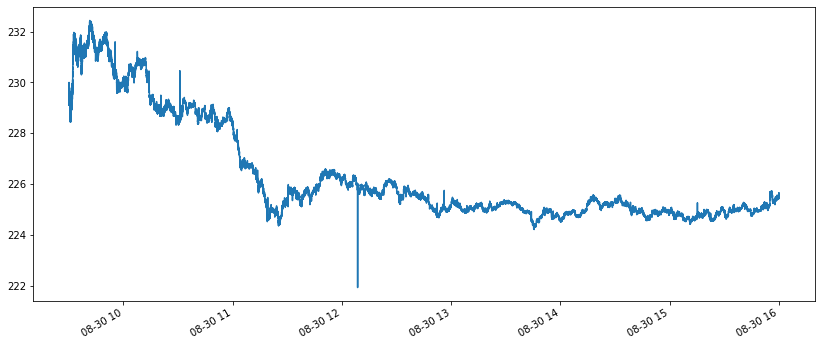

In [31]:
trades['2019-08-30']['PRICE'].plot()